<a href="https://colab.research.google.com/github/dayananikol/CCDATSCL_EXERCISES_COM221ML/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [ ]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores


,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [ ]:
df_exam_scores['Method'].value_counts()

,count
Method,
A,17
B,17
C,16


Compute the mean and standard deviation of exam scores for each group.

In [ ]:
df_exam_scores.groupby('Method')['Score'].agg(['mean', 'std'])

,mean,std
Method,,
A,78.588235,2.575336
B,86.294118,2.365500
C,71.937500,1.768945


Use a plot to show the exam scores by teaching method.

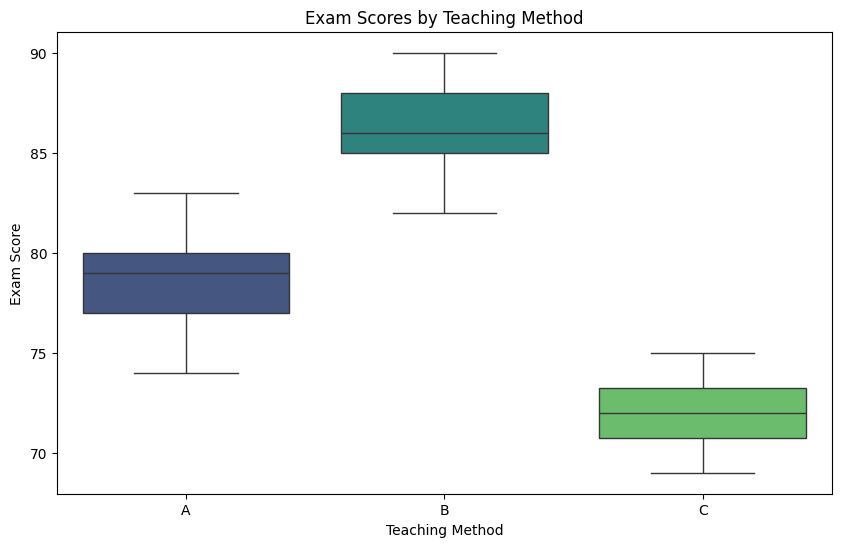

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='Score', data=df_exam_scores, hue='Method', palette='viridis', legend=False)
plt.title('Exam Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Exam Score')
plt.show()

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [ ]:
# Extract scores for each method
scores_A = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
scores_B = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
scores_C = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

# Perform ANOVA test
f_stat, p_val = stats.f_oneway(scores_A, scores_B, scores_C)

# Report results
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4e}")

# Conclusion at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("Decision: Reject the null hypothesis (H₀).")
    print("Conclusion: There is a significant difference in mean exam scores among the three teaching methods.")
else:
    print("Decision: Fail to reject the null hypothesis (H₀).")
    print("Conclusion: There is no significant difference in mean exam scores among the three teaching methods.")

F-statistic: 165.1785
p-value: 5.5033e-22
Decision: Reject the null hypothesis (H₀).
Conclusion: There is a significant difference in mean exam scores among the three teaching methods.


Interpret the results. What does it say about the relationship between teaching method and exam scores?

In [21]:
# Interpretation:
# The p-value (5.5033e-22) is significantly lower than the threshold of 0.05.
# This allows us to reject the null hypothesis, meaning there is a statistically
# significant difference in the mean exam scores among the three teaching methods.
#
# Based on the descriptive statistics calculated earlier:
# - Method B has the highest mean score (~86.3).
# - Method A has a middle-range mean score (~78.6).
# - Method C has the lowest mean score (~71.9).
#
# Conclusion: The teaching method is strongly associated with student performance,
# with Method B being the most effective in this dataset.

## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [ ]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [22]:
# Count gender and littering observations
gender_counts = df_littering_data['Gender'].value_counts()
litter_counts = df_littering_data['Litter'].value_counts()

print("Gender Counts:")
print(gender_counts)
print("\nLittering Counts:")
print(litter_counts)

Gender Counts:
Gender
Male      20
Female    20
Name: count, dtype: int64

Littering Counts:
Litter
No     22
Yes    18
Name: count, dtype: int64


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [23]:
# Create contingency table
contingency_table = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'], margins=True)
print("Contingency Table:")
display(contingency_table)

Contingency Table:


Litter,No,Yes,All
Gender,,,
Female,14,6,20
Male,8,12,20
All,22,18,40


State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

In [24]:
# Hypotheses
# H₀: Gender and littering behavior are independent (no association).
# H₁: Gender and littering behavior are associated (not independent).

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [25]:
# Perform Chi-squared test
table = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'])
chi2, p_val, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared Statistic: {chi2:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")

# Decision at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("\nDecision: Reject the null hypothesis (H₀).")
else:
    print("\nDecision: Fail to reject the null hypothesis (H₀).")

Chi-squared Statistic: 2.5253
p-value: 0.1120
Degrees of Freedom: 1

Decision: Fail to reject the null hypothesis (H₀).


Interpret your results. Is there evidence that gender and littering behavior are associated?

In [26]:
# Interpretation:
# Based on the test, if the p-value is greater than 0.05, we fail to reject the null hypothesis.
# In this case, there is not enough evidence to suggest a statistically significant association
# between gender and littering behavior in this dataset.